<a href="https://colab.research.google.com/github/alswjd5991/-11-kaggle-/blob/2nd_week/Backpack_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#탐색적 데이터 분석

In [159]:
import pandas as pd
import warnings

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

#데이터로드
raw_df = pd.read_csv('/content/drive/MyDrive/competition/Backpack Prediction Challenge/train.csv')
test = pd.read_csv('/content/drive/MyDrive/competition/Backpack Prediction Challenge/test.csv')
raw_df.head(10)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
5,5,Nike,Canvas,Medium,10.0,No,Yes,NaN,Black,7.241812,20.01553
6,6,Nike,NaN,Large,3.0,No,No,Backpack,Green,6.828123,84.80500
7,7,Puma,Canvas,Small,1.0,Yes,Yes,Backpack,Blue,21.488864,27.15815
8,8,Under Armour,Polyester,Medium,8.0,Yes,No,Tote,Gray,10.207780,25.98652
9,9,Under Armour,Nylon,Medium,2.0,Yes,Yes,Messenger,Pink,15.895100,38.48741


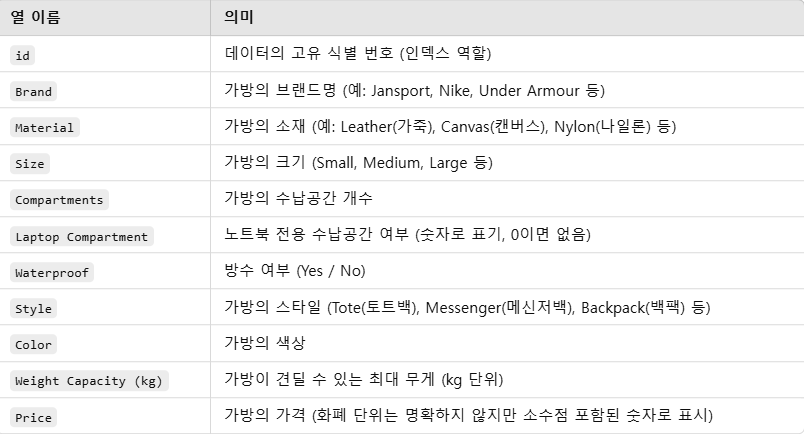

In [160]:
test.head(10)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953
5,300005,Under Armour,Nylon,Medium,8.0,No,No,Backpack,Black,17.547673
6,300006,Nike,Nylon,Large,8.0,No,Yes,Tote,Blue,16.003025
7,300007,Jansport,Polyester,Medium,6.0,Yes,No,Backpack,Blue,24.238091
8,300008,Nike,Canvas,Large,8.0,Yes,Yes,Backpack,Red,19.181167
9,300009,Puma,Leather,Large,1.0,No,No,Tote,Blue,9.937962


In [161]:
submission = pd.read_csv('/content/drive/MyDrive/competition/Backpack Prediction Challenge/sample_submission.csv')
submission.head()

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411


In [162]:
raw_df.shape,test.shape

((300000, 11), (200000, 10))

In [163]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [164]:
raw_df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [165]:
raw_df.isnull().sum().sort_values(ascending=False)

,0
Color,9950
Brand,9705
Material,8347
Style,7970
Laptop Compartment,7444
Waterproof,7050
Size,6595
Weight Capacity (kg),138
id,0
Compartments,0


In [166]:
df = raw_df.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)
df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


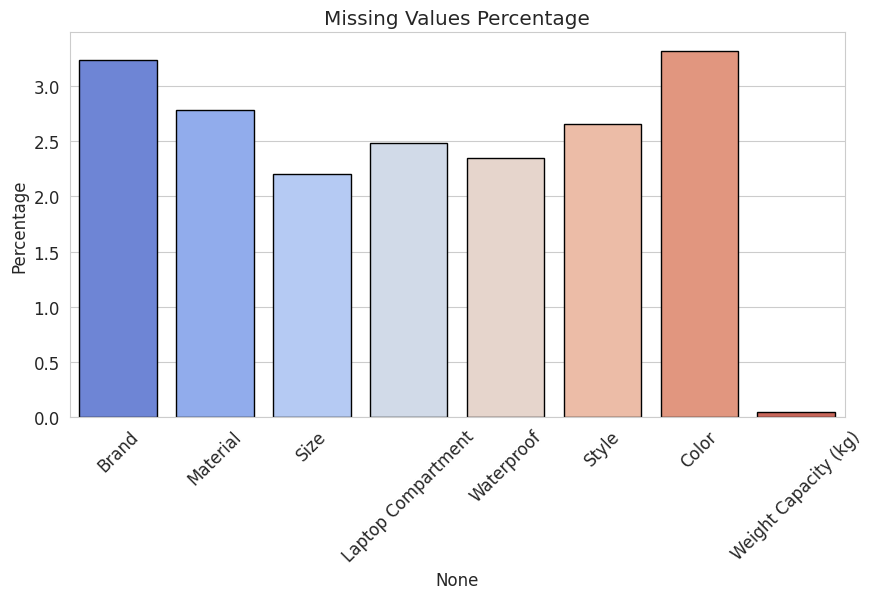

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결측치 비율 확인
missing_values = df.isnull().mean() * 100
if missing_values.sum() > 0:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_values[missing_values > 0].index, y=missing_values[missing_values > 0], palette="coolwarm", edgecolor='k', hue=None)
    plt.title("Missing Values Percentage")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.show()

In [168]:
from sys import is_finalizing

def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns = {'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['결측값 비율(%)'] = df.isnull().sum().values/df.shape[0]*100
  summary['고유값 개수'] = df.nunique().values
  summary['데이터 종류']= None
  for col in df.columns:
    if df[col].nunique() == 2:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '이진형'
    elif df[col].dtype == 'object':
      summary.loc[summary['피처'] == col, '데이터 종류'] = '범주형'
    else:
      summary.loc[summary['피처'] == col, '데이터 종류'] = '연속형'
  return summary

resumetable(df)

데이터셋 형상: (300000, 10)


,피처,데이터 타입,결측값 개수,결측값 비율(%),고유값 개수,데이터 종류
0,Brand,object,9705,3.235000,5,범주형
1,Material,object,8347,2.782333,4,범주형
2,Size,object,6595,2.198333,3,범주형
3,Compartments,float64,0,0.000000,10,연속형
4,Laptop Compartment,object,7444,2.481333,2,이진형
5,Waterproof,object,7050,2.350000,2,이진형
6,Style,object,7970,2.656667,3,범주형
7,Color,object,9950,3.316667,6,범주형
8,Weight Capacity (kg),float64,138,0.046000,181596,연속형
9,Price,float64,0,0.000000,48212,연속형


In [169]:
raw_df.groupby('Brand')['Price'].agg(Price_mean =('mean'))

,Price_mean
Brand,
Adidas,80.631060
Jansport,81.791276
Nike,81.319209
Puma,81.448607
Under Armour,81.976311


In [170]:
df.groupby('Material')['Price'].agg(Price_mean =('mean'))

,Price_mean
Material,
Canvas,82.106511
Leather,80.437883
Nylon,81.024760
Polyester,82.033315


,Price
count,300000.000000
mean,81.411107
std,39.039340
min,15.000000
25%,47.384620
50%,80.956120
75%,115.018160
max,150.000000


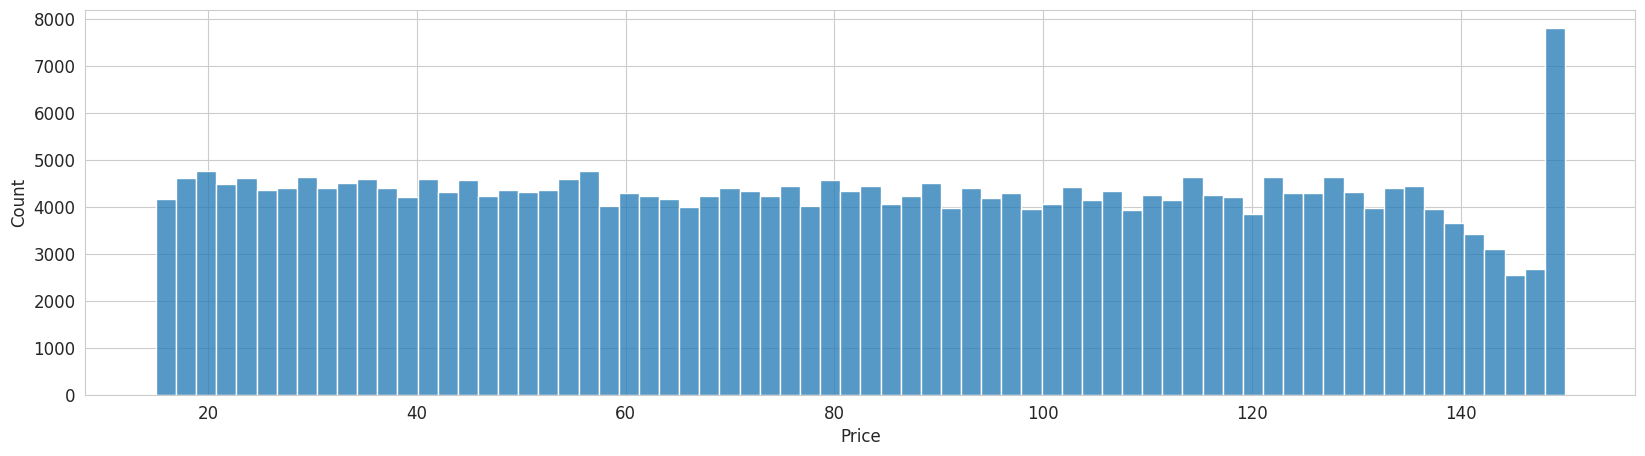

In [171]:
#'Price'컬럼 시각화

import matplotlib.pyplot as plt
import seaborn as sns

display(pd.DataFrame(df['Price'].describe()))
plt.figure(figsize=(20,5))
sns.histplot(df['Price'], bins=70)
plt.show()

In [172]:
duplicated_rows = df.duplicated()
sum(duplicated_rows)

0

In [173]:
#범주형
categorical_columns = df.select_dtypes(include=['object']).columns
test_categorical_columns = test.select_dtypes(include=['object']).columns

#연속형
numerical_columns = df.select_dtypes(include=['float64']).columns
test_numerical_columns = test.select_dtypes(include=['float64']).columns

#범주형인 경우 최빈값으로 채우기(mode()) - 최빈값이 여러 개인 경우 첫번째로 채우기
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
test[test_categorical_columns] = test[test_categorical_columns].fillna(test[test_categorical_columns].mode().iloc[0])

#연속형 변수의 경우 - median으로 채움
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
test[test_numerical_columns] = test[test_numerical_columns].fillna(test[test_numerical_columns].median())

In [174]:
resumetable(df)

데이터셋 형상: (300000, 10)


,피처,데이터 타입,결측값 개수,결측값 비율(%),고유값 개수,데이터 종류
0,Brand,object,0,0.0,5,범주형
1,Material,object,0,0.0,4,범주형
2,Size,object,0,0.0,3,범주형
3,Compartments,float64,0,0.0,10,연속형
4,Laptop Compartment,object,0,0.0,2,이진형
5,Waterproof,object,0,0.0,2,이진형
6,Style,object,0,0.0,3,범주형
7,Color,object,0,0.0,6,범주형
8,Weight Capacity (kg),float64,0,0.0,181596,연속형
9,Price,float64,0,0.0,48212,연속형


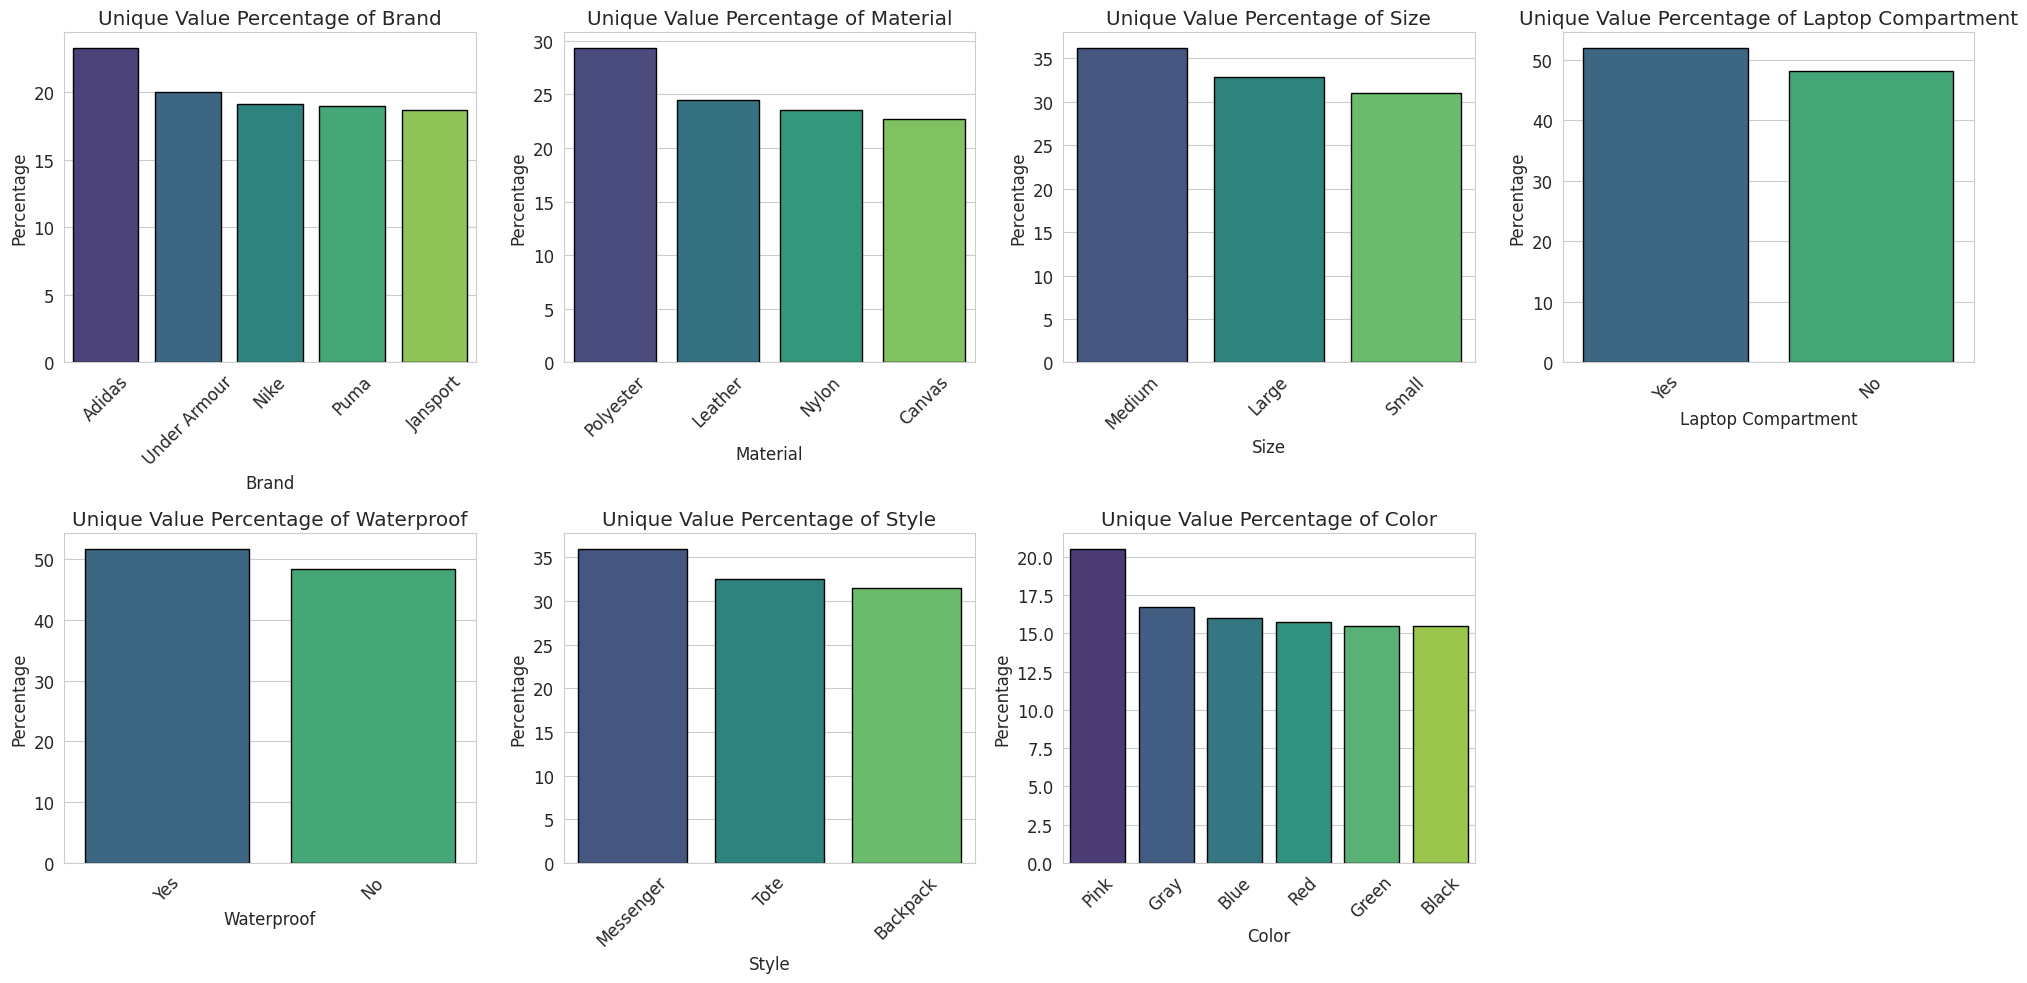

In [175]:
#범주형 컬럼 고유값 비율 시각화
categorical_columns = df.select_dtypes(include=['object']).columns
num_plots = min(len(categorical_columns), 7)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_columns[:num_plots]):
    sns.barplot(x=df[col].value_counts(normalize=True).index,
                y=df[col].value_counts(normalize=True) * 100,
                ax=axes[i], palette="viridis", edgecolor='k')
    axes[i].set_title(f'Unique Value Percentage of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

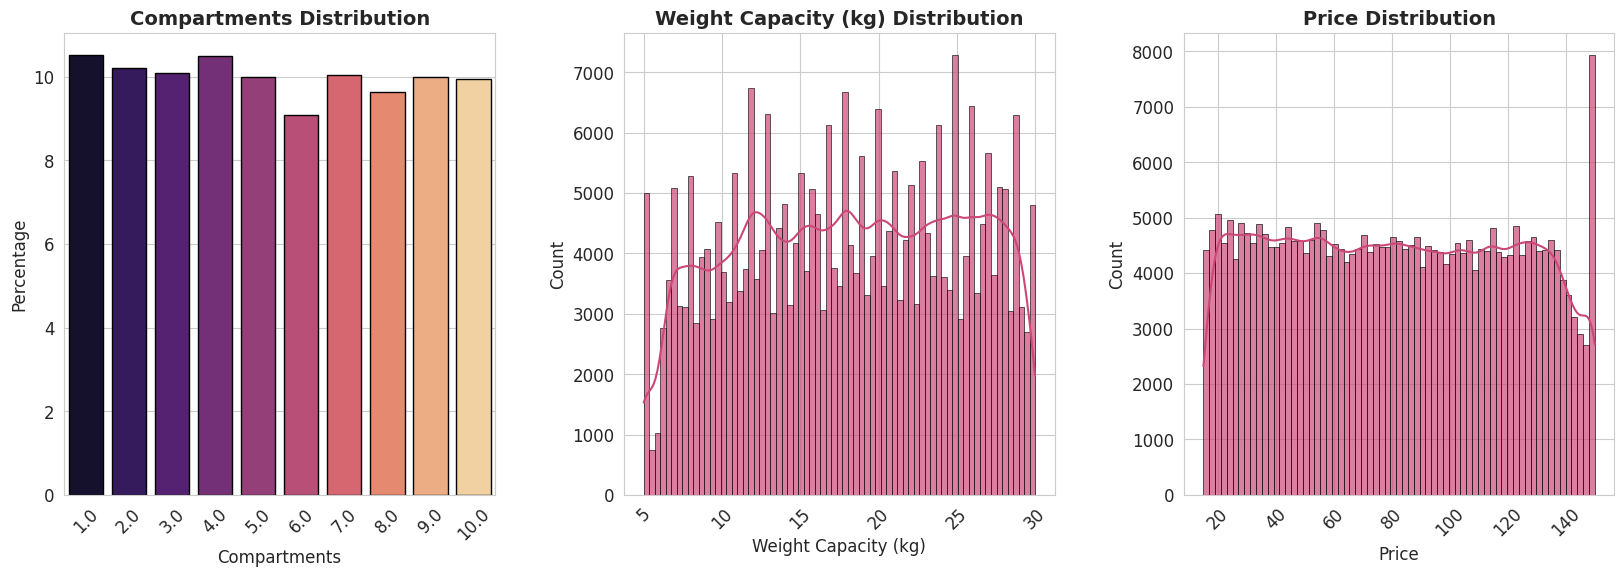

In [176]:
#연속형 컬럼 고유값 비율 시각화
# 스타일 설정
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# 연속형 컬럼 선택
numerical_columns = df.select_dtypes(include=['float64']).columns

# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 시각화
for i, col in enumerate(numerical_columns[:3]):  # 최대 3개까지만 출력
    ax = axes[i]
    if df[col].nunique() > 10:  # 히스토그램
        sns.histplot(df[col], ax=ax, kde=True, color=plt.cm.get_cmap('plasma')(0.5), edgecolor='black', alpha=0.7)
    else:  # 바 차트
        value_counts = df[col].value_counts(normalize=True)
        sns.barplot(x=value_counts.index, y=value_counts.values * 100, ax=ax,
                    palette='magma', edgecolor='black')
        ax.set_ylabel('Percentage')

    ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(wspace=0.3)  # 그래프 간격 조정
plt.show()

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 300000 non-null  object 
 1   Material              300000 non-null  object 
 2   Size                  300000 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    300000 non-null  object 
 5   Waterproof            300000 non-null  object 
 6   Style                 300000 non-null  object 
 7   Color                 300000 non-null  object 
 8   Weight Capacity (kg)  300000 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 22.9+ MB


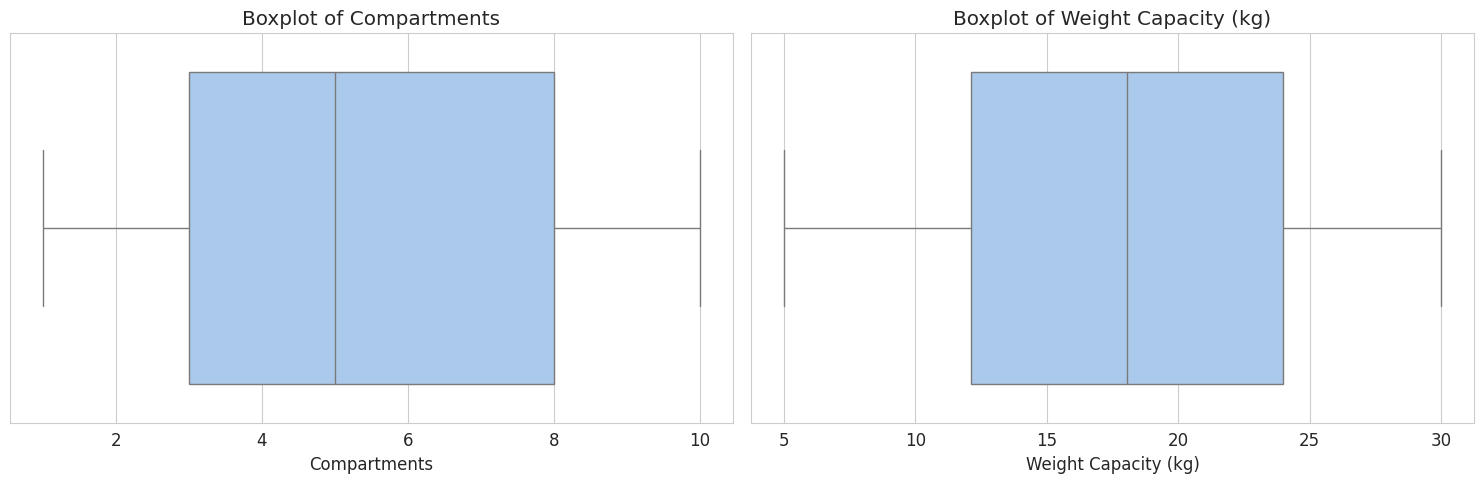

In [178]:
# 연속형 컬럼 이상값 시각화 (2열로 구성, 타겟 변수 제외)
numeric_columns = df.select_dtypes(include=['float64']).columns.drop('Price')
fig, axes = plt.subplots(1, 2, figsize=(15, 5 * (len(numeric_columns) // 2 + len(numeric_columns) % 2)))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], palette="pastel", ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [179]:
df.describe()

,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,300000.000000
mean,5.443590,18.030012,81.411107
std,2.890766,6.965312,39.039340
min,1.000000,5.000000,15.000000
25%,3.000000,12.099086,47.384620
50%,5.000000,18.068614,80.956120
75%,8.000000,24.001145,115.018160
max,10.000000,30.000000,150.000000


In [180]:
# 이상값 탐색 및 출력 (IQR 방식 적용, 타겟 변수 제외)
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, Lower Bound={lower_bound:.2f}, Upper Bound={upper_bound:.2f}, 이상값 개수: {outliers.shape[0]}")

Compartments: Q1=3.00, Q3=8.00, IQR=5.00, Lower Bound=-4.50, Upper Bound=15.50, 이상값 개수: 0
Weight Capacity (kg): Q1=12.10, Q3=24.00, IQR=11.90, Lower Bound=-5.75, Upper Bound=41.85, 이상값 개수: 0


테스트 데이터

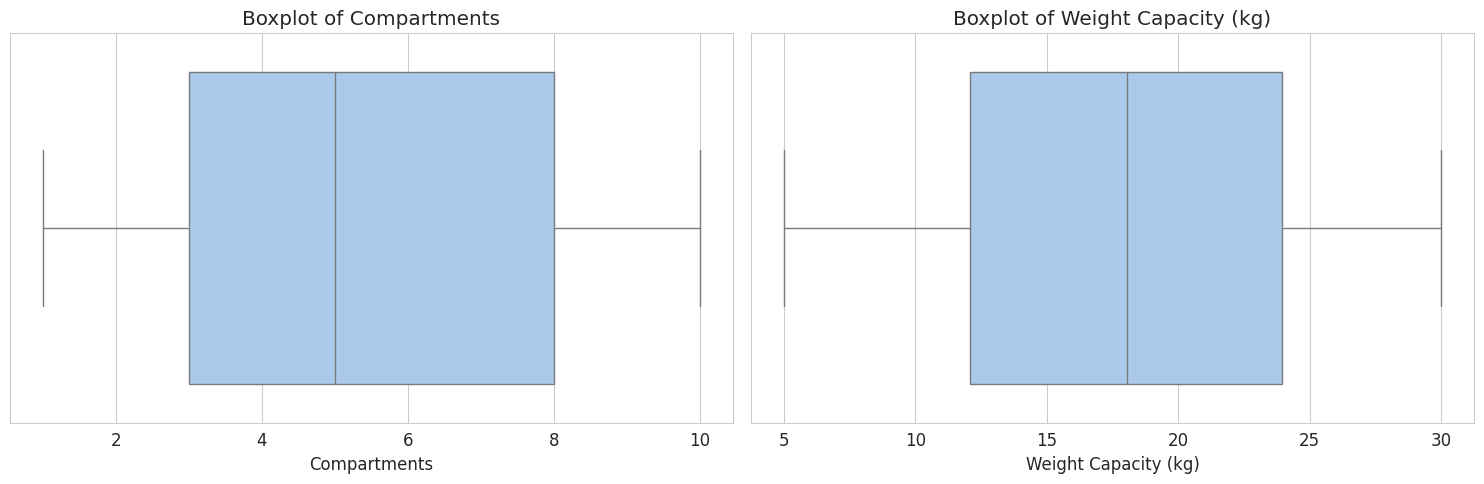

Compartments: Q1=3.00, Q3=8.00, IQR=5.00, Lower Bound=-4.50, Upper Bound=15.50, 이상값 개수: 0
Weight Capacity (kg): Q1=12.10, Q3=24.00, IQR=11.90, Lower Bound=-5.75, Upper Bound=41.85, 이상값 개수: 0


In [181]:
# 이상값 시각화 (2열로 구성, 타겟 변수 제외)
numeric_columns = test.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5 * (len(numeric_columns) // 2 + len(numeric_columns) % 2)))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=test[col], palette="pastel", ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 이상값 탐색 및 출력 (IQR 방식 적용, 타겟 변수 제외)
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, Lower Bound={lower_bound:.2f}, Upper Bound={upper_bound:.2f}, 이상값 개수: {outliers.shape[0]}")

#Catboost

In [ ]:
df1 = df.copy()
test1 = test.copy()

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

target_variable = "Price"  # 목표 변수 지정

# 범주형 변수 변환
categorical_columns = df1.select_dtypes(include=['object']).columns
df1 = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)

# 수치형 변수 스케일링
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns.drop(target_variable)
scaler = StandardScaler()
df1[numeric_columns] = scaler.fit_transform(df1[numeric_columns])

# 훈련/테스트 데이터 분할
X = df1.drop(columns=[target_variable])
y = df1[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 모델링
model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=100)
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, use_best_model=True)

# 예측 및 평가
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


0:	learn: 39.0591639	test: 38.9407882	best: 38.9407882 (0)	total: 75.3ms	remaining: 37.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 38.91908209
bestIteration = 44

Shrink model to first 45 iterations.
MAE: 33.6480
MSE: 1514.6949
RMSE: 38.9191
R-squared: 0.0013


In [ ]:
#테스트데이터
# 범주형 변수 변환 (One-Hot Encoding)
categorical_columns = test1.select_dtypes(include=['object']).columns
test1 = pd.get_dummies(test1, columns=categorical_columns, drop_first=True)

# 수치형 변수 스케일링
numeric_columns = test1.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
test1[numeric_columns] = scaler.fit_transform(test1[numeric_columns])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Compartments            300000 non-null  float64
 1   Weight Capacity (kg)    300000 non-null  float64
 2   Price                   300000 non-null  float64
 3   Brand_Jansport          300000 non-null  bool   
 4   Brand_Nike              300000 non-null  bool   
 5   Brand_Puma              300000 non-null  bool   
 6   Brand_Under Armour      300000 non-null  bool   
 7   Material_Leather        300000 non-null  bool   
 8   Material_Nylon          300000 non-null  bool   
 9   Material_Polyester      300000 non-null  bool   
 10  Size_Medium             300000 non-null  bool   
 11  Size_Small              300000 non-null  bool   
 12  Laptop Compartment_Yes  300000 non-null  bool   
 13  Waterproof_Yes          300000 non-null  bool   
 14  Style_Messenger     

In [ ]:
model.fit(X, y)

In [ ]:
test_prediction = model.predict(test1)
submission['Price']=test_prediction
submission.to_csv('predd.csv',index=False)

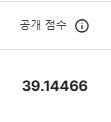

#Catboost+LightGBM+XGBoost

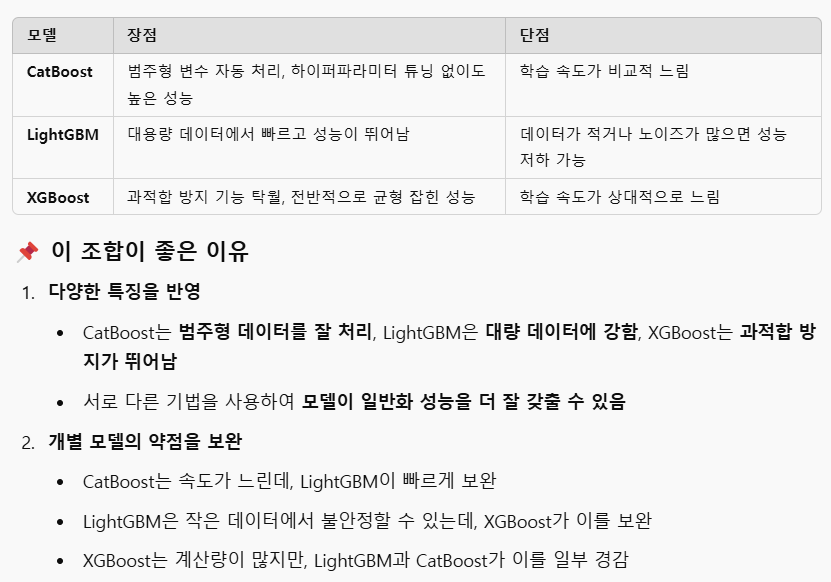

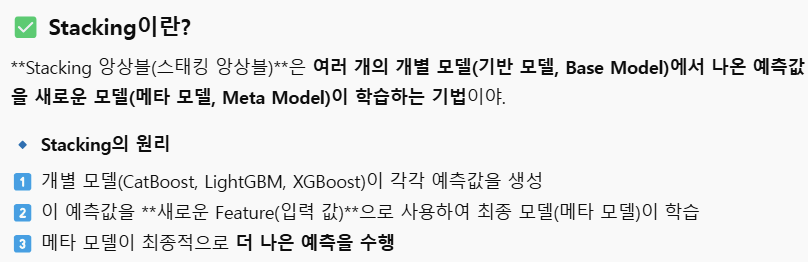

In [250]:
df2 = df.copy()
test2 = test.copy()

In [251]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 300000 non-null  object 
 1   Material              300000 non-null  object 
 2   Size                  300000 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    300000 non-null  object 
 5   Waterproof            300000 non-null  object 
 6   Style                 300000 non-null  object 
 7   Color                 300000 non-null  object 
 8   Weight Capacity (kg)  300000 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 22.9+ MB


In [246]:
categorical_columns = df2.select_dtypes(include=['object']).columns
numeric_columns = df2.select_dtypes(include=['float64']).columns.drop('Price')

In [252]:
df2.head(10)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
5,Nike,Canvas,Medium,10.0,No,Yes,Messenger,Black,7.241812,20.01553
6,Nike,Polyester,Large,3.0,No,No,Backpack,Green,6.828123,84.80500
7,Puma,Canvas,Small,1.0,Yes,Yes,Backpack,Blue,21.488864,27.15815
8,Under Armour,Polyester,Medium,8.0,Yes,No,Tote,Gray,10.207780,25.98652
9,Under Armour,Nylon,Medium,2.0,Yes,Yes,Messenger,Pink,15.895100,38.48741


In [249]:
!pip install optuna
!pip install catboost

In [253]:
import optuna
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

# 무게 대비 칸 개수 생성
df2["Compartment_per_Weight"] = df2["Compartments"] / (df2["Weight Capacity (kg)"] + 1)
test2["Compartment_per_Weight"] = test2["Compartments"] / (test2["Weight Capacity (kg)"] + 1)

# 범주형 데이터 변환
# 순서형 변수 (Size) 처리 - 작은 값부터 순위 부여
df2["Size"] = df2["Size"].map({"Small": 0, "Medium": 1, "Large": 2})
test2["Size"] = test2["Size"].map({"Small": 0, "Medium": 1, "Large": 2})

# 이진형 변수 (Waterproof) 처리
df2['Laptop Compartment'] = df2['Laptop Compartment'].map({'No': 0, 'Yes': 1})
test2['Laptop Compartment'] = test2['Laptop Compartment'].map({'No': 0, 'Yes': 1})
df2["Waterproof"] = df2["Waterproof"].map({"No": 0, "Yes": 1})
test2["Waterproof"] = test2["Waterproof"].map({"No": 0, "Yes": 1})

# 명목형 변수 (Brand, Material, Color) 원핫 인코딩
ohe_cols = ["Brand", "Material", "Color","Style"]
df2 = pd.get_dummies(df2, columns=ohe_cols, drop_first=True)
test2 = pd.get_dummies(test2, columns=ohe_cols, drop_first=True)

df2

,Size,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Price,Compartment_per_Weight,Brand_Jansport,Brand_Nike,Brand_Puma,...,Material_Leather,Material_Nylon,Material_Polyester,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Style_Messenger,Style_Tote
0,1,7.0,1,0,11.611723,112.15875,0.555039,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,0,10.0,1,1,27.078537,68.88056,0.356144,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,0,2.0,1,0,16.643760,39.17320,0.113355,False,False,False,...,True,False,False,False,False,False,False,True,True,False
3,0,8.0,1,0,12.937220,80.60793,0.574003,False,True,False,...,False,True,False,False,False,True,False,False,True,False
4,1,1.0,1,1,17.749338,86.02312,0.053335,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,9.0,0,0,12.730812,129.99749,0.655460,False,False,False,...,True,False,False,True,False,False,False,False,False,True
299996,2,6.0,0,1,26.633182,19.85819,0.217130,True,False,False,...,True,False,False,True,False,False,False,False,False,True
299997,2,9.0,1,1,11.898250,111.41364,0.697769,False,False,True,...,False,False,False,False,False,False,True,False,False,False
299998,0,1.0,0,1,6.175738,115.89080,0.139358,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [254]:
# 데이터 분할
X = df2.drop(columns=["Price"])
y = df2["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝 (Optuna 활용, 속도 최적화)
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 500, 1500),  # 범위를 줄여서 속도 향상
        "depth": trial.suggest_int("depth", 4, 8),  # 너무 깊은 트리는 학습 시간이 길어짐
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.05, 0.2),  # 적정 범위 내에서 설정
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 1),  # 과적합 방지
        "border_count": trial.suggest_int("border_count", 32, 128),  # 카테고리 경계 개수 줄이기
    }

    model = CatBoostRegressor(**params, verbose=0)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="neg_mean_squared_error", n_jobs=-1).mean()  # cv 개수 감소
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)  # n_trials 줄여서 속도 개선
best_params = study.best_params

[I 2025-02-17 06:32:56,144] A new study created in memory with name: no-name-869d115c-9afd-40d4-9a7b-6015600f7a97
[I 2025-02-17 06:34:16,793] Trial 0 finished with value: -1552.4632176936311 and parameters: {'iterations': 1201, 'depth': 7, 'learning_rate': 0.09108654550800191, 'l2_leaf_reg': 0.08728835296715262, 'border_count': 66}. Best is trial 0 with value: -1552.4632176936311.
[I 2025-02-17 06:34:39,774] Trial 1 finished with value: -1525.4669384099925 and parameters: {'iterations': 563, 'depth': 4, 'learning_rate': 0.07214374905078515, 'l2_leaf_reg': 0.11097785899254574, 'border_count': 121}. Best is trial 1 with value: -1525.4669384099925.
[I 2025-02-17 06:36:23,069] Trial 2 finished with value: -1545.1414156020708 and parameters: {'iterations': 1466, 'depth': 7, 'learning_rate': 0.06308560042220258, 'l2_leaf_reg': 0.18211272445684237, 'border_count': 99}. Best is trial 1 with value: -1525.4669384099925.
[I 2025-02-17 06:37:20,326] Trial 3 finished with value: -1549.5620399046472

KeyboardInterrupt: 

In [ ]:
# 앙상블 모델 생성 (CatBoost + LightGBM + XGBoost)
cat_model = CatBoostRegressor(**best_params, verbose=0)
lgb_model = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=31)
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6)

stacking_model = StackingRegressor(
    estimators=[("catboost", cat_model), ("lightgbm", lgb_model), ("xgboost", xgb_model)],
    final_estimator=CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, verbose=0)
)

# 모델 학습 및 평가
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Stacking Model RMSE: {rmse:.4f}")

In [ ]:
test_prediction = stacking_model.predict(test2)
submission['Price']=test_prediction
submission.to_csv('preddd.csv',index=False)